# Obtenção da repetição origem-destino com grids de 100m, agora com todas as áreas da parte rural de Ann Arbor

In [ ]:
import skmob
from skmob.utils import utils, constants
from skmob.tessellation import tilers
from skmob.utils.plot import plot_gdf

import numpy as np
import pandas as pd
import geopandas as gpd
import shapely
import folium
from folium.plugins import HeatMap
import matplotlib as mpl
import matplotlib.pyplot as plt

## 1) Filtrar pelo id do veículo e concatenar em um único DataFrame

In [ ]:
import pandas as pd
import glob
import numpy as np
files = glob.glob("/media/joao/Seagate Expansion Drive 09032021/22122022/ved_descompactados/*.csv")

df = pd.DataFrame()
for f in files:
    plt = pd.read_csv(f, sep = ",")
    df = pd.concat([plt,df], ignore_index=False)
    df = df.loc[(df['VehId'] == 630)]

df

## 2) Ordernar pelas colunas do trip_id pelo Timestamp

In [ ]:
df = df.sort_values(by=['Trip','Timestamp(ms)'])


df

## 1.1) Analisar todos os arquivos de trajetórias

In [ ]:
df['Trip'].nunique()

In [ ]:
#df['VehId'].nunique()

In [ ]:
df['Trip'].unique()

In [ ]:
#df['VehId'].unique()

## Obs.: antes de prosseguir, determino o datetime

In [ ]:
#df = df.sort_values(by='DayNum')

df['datetime'] = pd.to_datetime(df['DayNum'], unit='D', origin=pd.Timestamp('2017-11-01'))


print(df['datetime'].min())

print(df['datetime'].max())


print(df['DayNum'].min())

print(df['DayNum'].max())

print(df.shape)

In [ ]:
t = pd.DataFrame()

t = pd.date_range(start='2018-05-05 16:46:47.212838400', end='2018-05-05 16:46:47.212838400', periods=424)


df['datetime'] = t

df.datetime

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime']).round('s')

df.datetime

## 3) Criação da malha de grids por 100m a hipotenusa

In [1]:
import pandas as pd
import geopandas as gpd

#vei8 = df

In [2]:
from skmob.tessellation import tilers
from skmob.preprocessing import filtering

In [3]:
#import pandas as pd
import skmob
#import geopandas as gpd
from skmob import preprocessing

<Axes: >

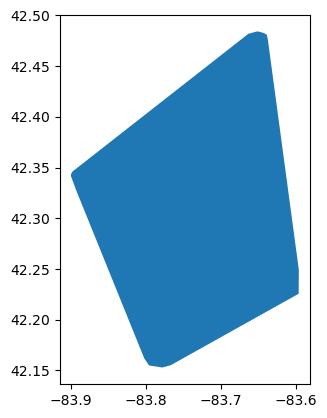

In [4]:
tessellation = gpd.read_file('/home/joao/Documentos/shapefiles ann arbor/limite_geral_tess.gpkg')

tessellation = tessellation.to_crs('EPSG:4326')

tessellation.plot()

In [5]:
tessellation

,id,area,perimeter,geometry
0,0,0.062761,0.988398,"POLYGON ((-83.77837 42.15297, -83.79607 42.154..."


In [6]:
tessellation = tessellation.to_crs('EPSG:6498')

tessellation

,id,area,perimeter,geometry
0,0,0.062761,0.988398,"POLYGON ((4048622.676 72701.070, 4047158.523 7..."


In [7]:
df = gpd.read_file('veiculo371_final_STDBSCAN.gpkg')

df['lon'] = df.geometry.x
df['lat'] = df.geometry.y

df

,field_1,DayNum,VehId,Trip,Timestamp(ms),Latitude[deg],Longitude[deg],Vehicle Speed[km/h],MAF[g/sec],Engine RPM[RPM],...,Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%],datetime,CLUSTER_ID,CLUSTER_SIZE,geometry,lon,lat
0,241071,11.504784,371,1336,0,42.264781,-83.680563,58.369999,0.71,0.0,...,NaN,NaN,NaN,NaN,2017-11-11 00:23:26,1,623,POINT (4056605.316 85181.216),4.056605e+06,85181.215570
1,241072,11.504784,371,1336,800,42.264781,-83.680563,58.980000,0.71,0.0,...,NaN,NaN,NaN,NaN,2017-11-11 00:24:56,1,623,POINT (4056605.316 85181.216),4.056605e+06,85181.215570
2,241073,11.504784,371,1336,1800,42.264781,-83.680563,59.489998,0.71,0.0,...,NaN,NaN,NaN,NaN,2017-11-11 00:26:26,1,623,POINT (4056605.316 85181.216),4.056605e+06,85181.215570
3,241074,11.504784,371,1336,2900,42.264781,-83.680563,60.739998,0.71,0.0,...,NaN,NaN,NaN,NaN,2017-11-11 00:27:57,1,623,POINT (4056605.316 85181.216),4.056605e+06,85181.215570
4,241075,11.504784,371,1336,3000,42.264870,-83.681123,60.739998,0.71,0.0,...,NaN,NaN,NaN,NaN,2017-11-11 00:29:27,1,623,POINT (4056559.081 85190.743),4.056559e+06,85190.743416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,20383,372.459839,371,4395,350000,42.277191,-83.730813,15.790000,0.71,0.0,...,0.0,4.6875,NaN,NaN,2018-11-08 00:16:22,17,511,POINT (4052449.232 86527.064),4.052449e+06,86527.063948
10648,20384,372.459839,371,4395,350100,42.277191,-83.730813,15.790000,0.71,0.0,...,0.0,4.6875,NaN,NaN,2018-11-08 00:17:52,17,511,POINT (4052449.232 86527.064),4.052449e+06,86527.063948
10649,20385,372.459839,371,4395,350600,42.277191,-83.730813,21.420000,0.71,0.0,...,0.0,4.6875,NaN,NaN,2018-11-08 00:19:22,17,511,POINT (4052449.232 86527.064),4.052449e+06,86527.063948
10650,20386,372.459839,371,4395,351700,42.277191,-83.730813,24.709999,0.71,0.0,...,0.0,4.6875,NaN,NaN,2018-11-08 00:20:53,17,511,POINT (4052449.232 86527.064),4.052449e+06,86527.063948


In [8]:
df = df[['VehId','Trip','datetime','lon','lat','CLUSTER_ID','CLUSTER_SIZE','Vehicle Speed[km/h]']]

df

,VehId,Trip,datetime,lon,lat,CLUSTER_ID,CLUSTER_SIZE,Vehicle Speed[km/h]
0,371,1336,2017-11-11 00:23:26,4.056605e+06,85181.215570,1,623,58.369999
1,371,1336,2017-11-11 00:24:56,4.056605e+06,85181.215570,1,623,58.980000
2,371,1336,2017-11-11 00:26:26,4.056605e+06,85181.215570,1,623,59.489998
3,371,1336,2017-11-11 00:27:57,4.056605e+06,85181.215570,1,623,60.739998
4,371,1336,2017-11-11 00:29:27,4.056559e+06,85190.743416,1,623,60.739998
...,...,...,...,...,...,...,...,...
10647,371,4395,2018-11-08 00:16:22,4.052449e+06,86527.063948,17,511,15.790000
10648,371,4395,2018-11-08 00:17:52,4.052449e+06,86527.063948,17,511,15.790000
10649,371,4395,2018-11-08 00:19:22,4.052449e+06,86527.063948,17,511,21.420000
10650,371,4395,2018-11-08 00:20:53,4.052449e+06,86527.063948,17,511,24.709999


In [9]:
df = df.dropna()

df

,VehId,Trip,datetime,lon,lat,CLUSTER_ID,CLUSTER_SIZE,Vehicle Speed[km/h]
0,371,1336,2017-11-11 00:23:26,4.056605e+06,85181.215570,1,623,58.369999
1,371,1336,2017-11-11 00:24:56,4.056605e+06,85181.215570,1,623,58.980000
2,371,1336,2017-11-11 00:26:26,4.056605e+06,85181.215570,1,623,59.489998
3,371,1336,2017-11-11 00:27:57,4.056605e+06,85181.215570,1,623,60.739998
4,371,1336,2017-11-11 00:29:27,4.056559e+06,85190.743416,1,623,60.739998
...,...,...,...,...,...,...,...,...
10647,371,4395,2018-11-08 00:16:22,4.052449e+06,86527.063948,17,511,15.790000
10648,371,4395,2018-11-08 00:17:52,4.052449e+06,86527.063948,17,511,15.790000
10649,371,4395,2018-11-08 00:19:22,4.052449e+06,86527.063948,17,511,21.420000
10650,371,4395,2018-11-08 00:20:53,4.052449e+06,86527.063948,17,511,24.709999


In [10]:
gdf = gpd.GeoDataFrame(df, crs="EPSG:6498", geometry=gpd.points_from_xy(df["lon"], df["lat"]))

gdf

,VehId,Trip,datetime,lon,lat,CLUSTER_ID,CLUSTER_SIZE,Vehicle Speed[km/h],geometry
0,371,1336,2017-11-11 00:23:26,4.056605e+06,85181.215570,1,623,58.369999,POINT (4056605.316 85181.216)
1,371,1336,2017-11-11 00:24:56,4.056605e+06,85181.215570,1,623,58.980000,POINT (4056605.316 85181.216)
2,371,1336,2017-11-11 00:26:26,4.056605e+06,85181.215570,1,623,59.489998,POINT (4056605.316 85181.216)
3,371,1336,2017-11-11 00:27:57,4.056605e+06,85181.215570,1,623,60.739998,POINT (4056605.316 85181.216)
4,371,1336,2017-11-11 00:29:27,4.056559e+06,85190.743416,1,623,60.739998,POINT (4056559.081 85190.743)
...,...,...,...,...,...,...,...,...,...
10647,371,4395,2018-11-08 00:16:22,4.052449e+06,86527.063948,17,511,15.790000,POINT (4052449.232 86527.064)
10648,371,4395,2018-11-08 00:17:52,4.052449e+06,86527.063948,17,511,15.790000,POINT (4052449.232 86527.064)
10649,371,4395,2018-11-08 00:19:22,4.052449e+06,86527.063948,17,511,21.420000,POINT (4052449.232 86527.064)
10650,371,4395,2018-11-08 00:20:53,4.052449e+06,86527.063948,17,511,24.709999,POINT (4052449.232 86527.064)


In [ ]:
#tdf = skmob.TrajDataFrame(vei561, latitude="Latitude[deg]", longitude="Longitude[deg]", datetime="datetime", user_id="VehId", trajectory_id="Trip")

#tdf

In [ ]:
#gdf = gpd.read_file('/home/joao/Documentos/shapefiles ann arbor/AA_City_Boundary/AA_City_Boundary.shp')

#gdf = gdf.to_crs('EPSG:4326')

In [11]:
from skmob.tessellation import tilers

tessellation = tilers.tiler.get("squared", 
                                base_shape=tessellation, 
                                meters=100)

tessellation

/home/joao/anaconda3/envs/lab/lib/python3.10/site-packages/skmob/tessellation/tilers.py:117: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  base_shape = gpd.GeoSeries(cascaded_union(polygons), crs=base_shape.crs)


,tile_ID,geometry
0,0,"POLYGON ((-83.90017 42.33917, -83.90017 42.339..."
1,1,"POLYGON ((-83.90017 42.33983, -83.90017 42.340..."
2,2,"POLYGON ((-83.90017 42.34049, -83.90017 42.341..."
3,3,"POLYGON ((-83.90017 42.34116, -83.90017 42.341..."
4,4,"POLYGON ((-83.90017 42.34182, -83.90017 42.342..."
...,...,...
106008,106008,"POLYGON ((-83.59654 42.24680, -83.59654 42.247..."
106009,106009,"POLYGON ((-83.59654 42.24747, -83.59654 42.248..."
106010,106010,"POLYGON ((-83.59654 42.24813, -83.59654 42.248..."
106011,106011,"POLYGON ((-83.59654 42.24880, -83.59654 42.249..."


In [12]:
tessellation = tessellation.to_crs('EPSG:6498')

tessellation

,tile_ID,geometry
0,0,"POLYGON ((4038441.642 93319.476, 4038441.233 9..."
1,1,"POLYGON ((4038441.233 93393.229, 4038440.825 9..."
2,2,"POLYGON ((4038440.825 93466.981, 4038440.416 9..."
3,3,"POLYGON ((4038440.416 93540.732, 4038440.007 9..."
4,4,"POLYGON ((4038440.007 93614.483, 4038439.599 9..."
...,...,...
106008,106008,"POLYGON ((4063555.591 83244.267, 4063554.915 8..."
106009,106009,"POLYGON ((4063554.915 83318.126, 4063554.240 8..."
106010,106010,"POLYGON ((4063554.240 83391.984, 4063553.564 8..."
106011,106011,"POLYGON ((4063553.564 83465.842, 4063552.889 8..."


In [ ]:
# tessellation.to_file('tessellation100.gpkg', driver='GPKG')

In [ ]:
#tdf.columns

In [ ]:
#fdf = tdf.to_flowdataframe(tessellation=tessellation, self_loops=False)

#print(fdf.head())

In [13]:
mtdf = gdf.sjoin(tessellation, how='inner', predicate='within')

mtdf

,VehId,Trip,datetime,lon,lat,CLUSTER_ID,CLUSTER_SIZE,Vehicle Speed[km/h],geometry,index_right,tile_ID
0,371,1336,2017-11-11 00:23:26,4.056605e+06,85181.215570,1,623,58.369999,POINT (4056605.316 85181.216),75364,75364
1,371,1336,2017-11-11 00:24:56,4.056605e+06,85181.215570,1,623,58.980000,POINT (4056605.316 85181.216),75364,75364
2,371,1336,2017-11-11 00:26:26,4.056605e+06,85181.215570,1,623,59.489998,POINT (4056605.316 85181.216),75364,75364
3,371,1336,2017-11-11 00:27:57,4.056605e+06,85181.215570,1,623,60.739998,POINT (4056605.316 85181.216),75364,75364
623,371,1519,2017-12-07 01:37:37,4.056614e+06,85199.332943,2,532,58.529999,POINT (4056613.557 85199.333),75364,75364
...,...,...,...,...,...,...,...,...,...,...,...
10531,371,4395,2018-11-07 21:21:45,4.053371e+06,86252.785770,17,511,46.070000,POINT (4053371.465 86252.786),56924,56924
10532,371,4395,2018-11-07 21:23:16,4.053371e+06,86252.785770,17,511,46.070000,POINT (4053371.465 86252.786),56924,56924
10533,371,4395,2018-11-07 21:24:46,4.053371e+06,86252.785770,17,511,46.049999,POINT (4053371.465 86252.786),56924,56924
10534,371,4395,2018-11-07 21:26:16,4.053371e+06,86252.785770,17,511,46.049999,POINT (4053371.465 86252.786),56924,56924


In [45]:
#mtdf.to_file('mtdf_276_pos-stdbscan.gpkg')

In [14]:
mtdf.to_file('mtdf_371_pos-stdbscan.gpkg')

## 4) Posições iniciais e finais para cada Trip

In [ ]:
#import pandas as pd

#df = pd.read_csv('/home/joao/Documentos/Reuniões/Reuniões 2023/Reunião 4/mtdf_veiculo5.csv')

#df.drop({'Unnamed: 0'}, axis=1, inplace=True)

#df

In [15]:
import movingpandas as mpd

#### Obs.: se houver apenas 1 Trip, usar Timestamp(ms) no lugar do datetime.

In [16]:
traj = mpd.TrajectoryCollection(mtdf, traj_id_col='Trip', obj_id_col='VehId', t='datetime', x='lon', y='lat', crs='epsg:6498')
traj

TrajectoryCollection with 17 trajectories

In [17]:
# traj.plot(column='speed', legend=True, figsize=(9,5))

In [18]:
start = traj.get_start_locations()
end = traj.get_end_locations()

/home/joao/anaconda3/envs/lab/lib/python3.10/site-packages/movingpandas/trajectory_collection.py:231: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(x)
/home/joao/anaconda3/envs/lab/lib/python3.10/site-packages/movingpandas/trajectory_collection.py:231: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(x)
/home/joao/anaconda3/envs/lab/lib/python3.10/site-packages/movingpandas/trajectory_collection.py:231: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(x)
/home/joao/anaconda3/envs/lab/lib/python3.10/site-packages/movingpandas/trajectory_collection.py:231: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

In [19]:

start['lon'] = start.geometry.x
start['lat'] = start.geometry.y

In [20]:

end['lon'] = end.geometry.x
end['lat'] = end.geometry.y

<Axes: >

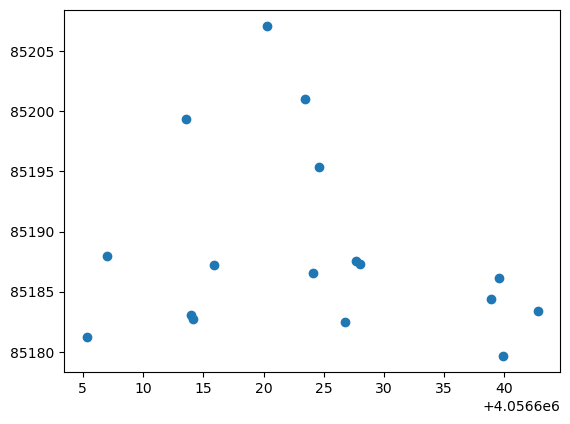

In [21]:
start.plot()

<Axes: >

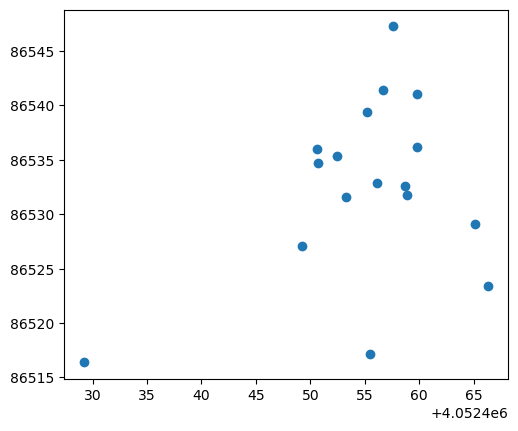

In [22]:
end.plot()

In [23]:
start['direção'] = 'Origem'
end['direção'] = 'Destino'



In [24]:
# pontos.to_csv('mtdf_veiculo119.csv')

## 5) Tabela com os pontos iniciais, finais e o id da trajetória

In [25]:
pontos = start.merge(end, on='Trip')

pontos

,VehId_x,Trip,lon_x,lat_x,CLUSTER_ID_x,CLUSTER_SIZE_x,Vehicle Speed[km/h]_x,geometry_x,index_right_x,tile_ID_x,...,VehId_y,lon_y,lat_y,CLUSTER_ID_y,CLUSTER_SIZE_y,Vehicle Speed[km/h]_y,geometry_y,index_right_y,tile_ID_y,direção_y
0,371,1336,4.056605e+06,85181.215570,1,623,58.369999,POINT (4056605.316 85181.216),75364,75364,...,371,4.052466e+06,86523.397785,1,623,26.570000,POINT (4052466.307 86523.398),51972,51972,Destino
1,371,1519,4.056614e+06,85199.332943,2,532,58.529999,POINT (4056613.557 85199.333),75364,75364,...,371,4.052453e+06,86531.537779,2,532,26.689999,POINT (4052453.300 86531.538),51972,51972,Destino
2,371,1530,4.056627e+06,85182.501118,3,936,55.649998,POINT (4056626.757 85182.501),75364,75364,...,371,4.052465e+06,86529.127636,3,936,11.490000,POINT (4052465.095 86529.128),51972,51972,Destino
3,371,1569,4.056628e+06,85187.537822,4,1011,43.809998,POINT (4056627.656 85187.538),75364,75364,...,371,4.052451e+06,86535.960387,4,1011,24.430000,POINT (4052450.585 86535.960),51972,51972,Destino
4,371,1624,4.056639e+06,85184.450958,5,738,44.169998,POINT (4056638.843 85184.451),75364,75364,...,371,4.052457e+06,86541.375223,5,738,19.039999,POINT (4052456.685 86541.375),51972,51972,Destino
5,371,1882,4.056640e+06,85186.123001,6,723,49.840000,POINT (4056639.562 85186.123),75364,75364,...,371,4.052456e+06,86532.886104,6,723,23.969999,POINT (4052456.154 86532.886),51972,51972,Destino
6,371,2121,4.056640e+06,85179.707814,7,646,46.410000,POINT (4056639.890 85179.708),75364,75364,...,371,4.052452e+06,86535.295636,7,646,13.980000,POINT (4052452.446 86535.296),51972,51972,Destino
7,371,2171,4.056628e+06,85187.325032,8,682,52.449997,POINT (4056628.047 85187.325),75364,75364,...,371,4.052451e+06,86534.726954,8,682,21.080000,POINT (4052450.686 86534.727),51972,51972,Destino
8,371,2227,4.056625e+06,85195.380863,9,538,61.149998,POINT (4056624.590 85195.381),75364,75364,...,371,4.052458e+06,86547.244410,9,538,18.119999,POINT (4052457.580 86547.244),51972,51972,Destino
9,371,2531,4.056616e+06,85187.256865,10,494,57.340000,POINT (4056615.901 85187.257),75364,75364,...,371,4.052455e+06,86539.420398,10,494,20.080000,POINT (4052455.234 86539.420),51972,51972,Destino


## 6) Tabela com os grids de origem e de destino

In [ ]:
#start = pd.read_csv('/home/joao/Documentos/Reuniões/Reuniões 2023/Reunião 4/origens_vei8.csv')
#end = pd.read_csv('/home/joao/Documentos/Reuniões/Reuniões 2023/Reunião 4/destinos_vei8.csv')

In [26]:
pontos.columns

Index(['VehId_x', 'Trip', 'lon_x', 'lat_x', 'CLUSTER_ID_x', 'CLUSTER_SIZE_x',
       'Vehicle Speed[km/h]_x', 'geometry_x', 'index_right_x', 'tile_ID_x',
       'direção_x', 'VehId_y', 'lon_y', 'lat_y', 'CLUSTER_ID_y',
       'CLUSTER_SIZE_y', 'Vehicle Speed[km/h]_y', 'geometry_y',
       'index_right_y', 'tile_ID_y', 'direção_y'],
      dtype='object')

In [27]:
#mtdf = mtdf[['uid', 'direção', 'tile_ID', 'lon', 'lat']]

#mtdf.rename({'uid':'veículo_id', 'tile_ID':'grid'}, axis=1, inplace=True)
pontos = pontos[['VehId_x', 'Trip', 'direção_x','direção_y', 'tile_ID_x','tile_ID_y','lon_x','lat_x','lon_y','lat_y']]

pontos.rename({ 'direção_x':'Origens','direção_y':'Destinos', 'tile_ID_x':'grid_origem','tile_ID_y':'grid_destino'}, axis=1, inplace=True)


/tmp/ipykernel_37174/1838683499.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pontos.rename({ 'direção_x':'Origens','direção_y':'Destinos', 'tile_ID_x':'grid_origem','tile_ID_y':'grid_destino'}, axis=1, inplace=True)


In [28]:
pontos.to_csv('/home/joao/Documentos/experimento_vei371.csv')

## 7) Somatório e análise

#### Primeiro, faço uma exploração por partes:

In [29]:
A = pd.DataFrame()

A['repetições'] = pontos.groupby(['grid_origem']).size().reset_index().groupby(['grid_origem']).sum()

A.shape

(1, 1)

In [30]:
B = pd.DataFrame()

B['repetições'] = pontos.groupby(['grid_destino']).size().reset_index().groupby(['grid_destino']).sum()

B.shape

(1, 1)

In [31]:
A.reset_index()

,grid_origem,repetições
0,75364,17


In [32]:
A['repetições'].sum()

17

In [33]:
A['repetições'].max()

17

In [34]:
B.reset_index()

,grid_destino,repetições
0,51972,17


In [35]:
B['repetições'].sum()

17

In [36]:
B['repetições'].max()

17

In [37]:
df = A.merge(B, left_on='grid_origem', right_on='grid_destino')

df

,repetições_x,repetições_y


#### Agora, faço o procedimento final:

In [38]:
df_final=pd.DataFrame()

df_final['repetições'] = pontos.groupby(['grid_origem','grid_destino']).size().reset_index().groupby(['grid_origem','grid_destino']).sum()

df_final.shape

(1, 1)

In [39]:
df_final = df_final.reset_index()

In [40]:
df_final

,grid_origem,grid_destino,repetições
0,75364,51972,17


In [41]:
df_final['repetições'].sum()

17

In [42]:
df_final['repetições'].nlargest(15)

0    17
Name: repetições, dtype: int64

In [43]:
df_final.to_csv('/home/joao/Documentos/experimento_vei371_repetições.csv')

#df_final.to_csv('/home/joao/Documentos/Reuniões/Reuniões 2023/Reunião 4/repetições_100m_vei561_17032023.csv')

#df_final.to_csv('/home/joao/Documentos/Reuniões/Reuniões 2023/Reunião 4/repetições_100m_vei12_14032023.csv')

#df_final.to_csv('/home/joao/Documentos/Reuniões/Reuniões 2023/Reunião 4/repetições_100m_vei610_12032023.csv')

In [ ]:
# pontos.to_csv('/home/joao/Documentos/Reuniões/Reuniões 2023/Reunião 4/pontos_vei561_100m.csv')

## FONTE ORIGINAL DOS GRIDS, ANTES DAS TRANSFORMAÇÕES: https://data.humdata.org/dataset/hotosm_usa_michigan_populated_places 